# Archive - checking against bilby

## Bilby

Put in archive since the waveform is weird for some parameter values, we have to check with LAL instead -- see above

In [ ]:
injection_parameters = dict(
    mass_1 = m1, 
    mass_2 = m2, 
    
    chi_1 = chi1,  
    chi_2 = chi2, 
    
    lambda_1 = lambda1,
    lambda_2 = lambda2,
    
    ra = 0.0, 
    dec = 0.0, 
    luminosity_distance = distance, 
    theta_jn = 0., 
    psi = 0., 
    geocent_time = 0., 
    phase = 0., 
)

In [ ]:
## NOTE - is this OK?
duration = 8
sampling_frequency = 1024
start_time = injection_parameters["geocent_time"] + 2 - duration

# Fixed arguments passed into the source model. The analysis starts at 40 Hz.
waveform_arguments = dict(
    waveform_approximant="IMRPhenomD_NRTidalv2",
    reference_frequency=f_ref,
    minimum_frequency=f_l,
)

# Create the waveform_generator using a LAL Binary Neutron Star source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments,
)

polas_bilby = waveform_generator.frequency_domain_strain(injection_parameters)
hp_bilby, hc_bilby = polas_bilby['plus'], polas_bilby['cross']

13:43 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


## Comparison

ValueError: x and y must have same first dimension, but have shapes (49600,) and (7935,)

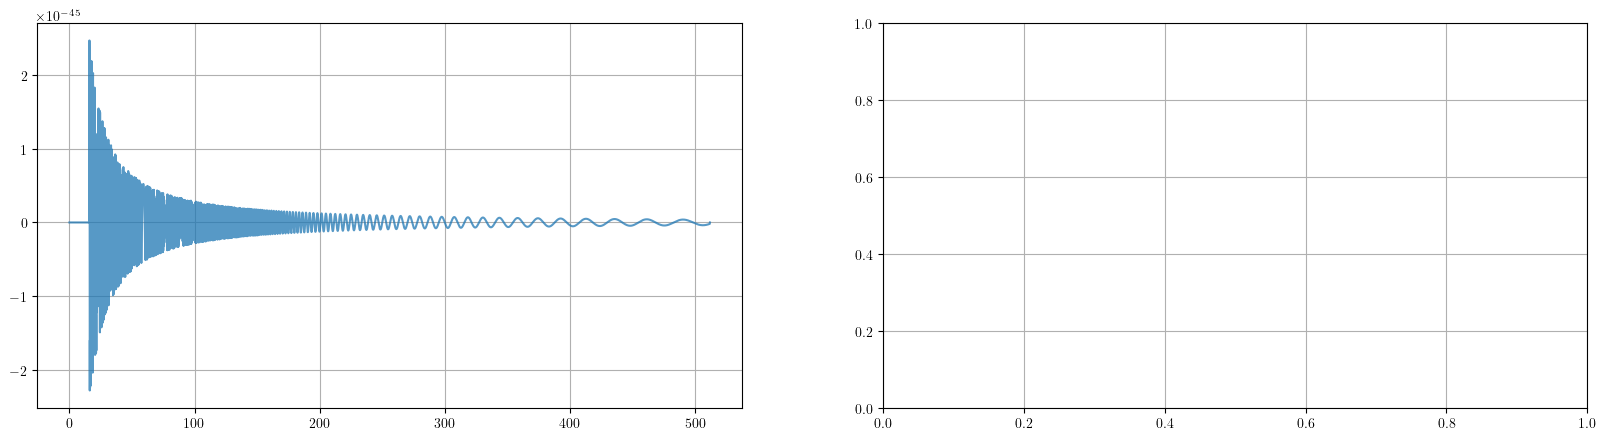

In [ ]:
a = 0.75
plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.plot(waveform_generator.frequency_array, hp_bilby.real, "-", label = "Bilby", alpha = a)
plt.plot(fs_ripple, hp_ripple.real, "--", label = "ripple", alpha = a)
plt.title(f"h+, NRTidalv2 lambda1, lambda2 = {lambda1, lambda2}")
plt.title(r"$h_+$ NRTidalv2 ($\Lambda_1, \Lambda_2) = ({}, {}$)".format(lambda1, lambda2))
plt.xlabel("Frequency")
plt.ylabel("Strain")
plt.xscale('log')
plt.xlim(f_l - 5)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(waveform_generator.frequency_array, hc_bilby.real, "-", label = "Bilby", alpha = a)
plt.plot(fs_ripple, hc_ripple.real, "--", label = "ripple", alpha = a)
plt.legend()
plt.title(r"$h_\times$ NRTidalv2 ($\Lambda_1, \Lambda_2) = ({}, {}$)".format(lambda1, lambda2))
plt.xlabel("Frequency")
plt.ylabel("Strain")
plt.xscale('log')
plt.xlim(f_l - 5)
plt.show()

Only a single waveform below and larger picture to easily spot any differences:

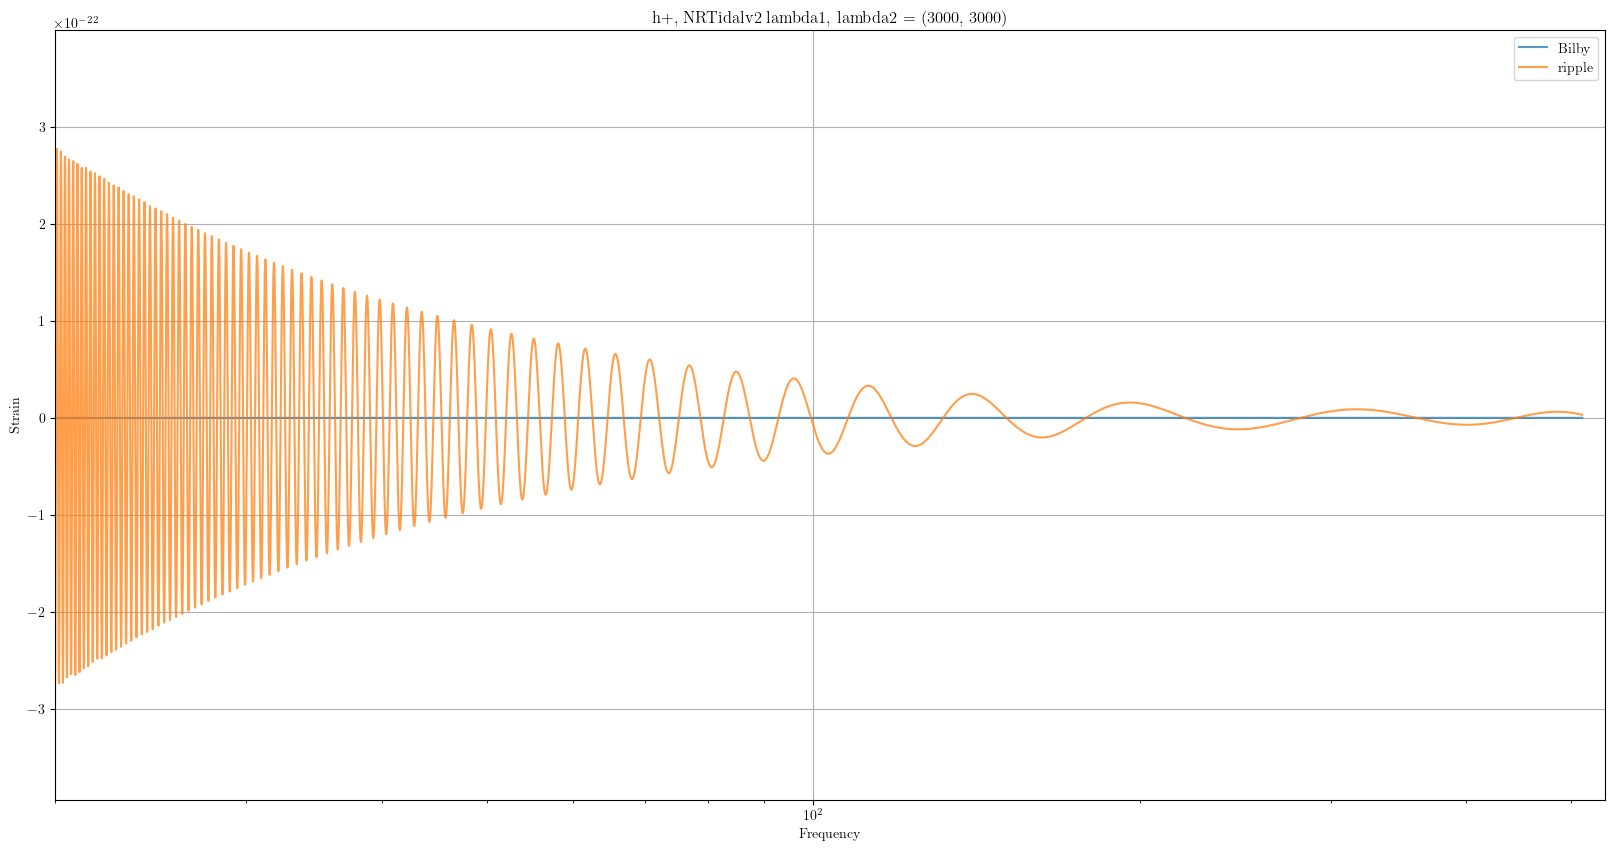

In [ ]:
a = 0.75
plt.figure(figsize=(20, 10))

plt.plot(waveform_generator.frequency_array, hp_bilby.real, "-", label = "Bilby", alpha = a)
plt.plot(fs_ripple, hp_ripple.real, "-", label = "ripple", alpha = a)
plt.title(f"h+, NRTidalv2 lambda1, lambda2 = {lambda1, lambda2}")
plt.xlabel("Frequency")
plt.ylabel("Strain")
plt.legend()
plt.xlim(20)
plt.xscale('log')
plt.show()


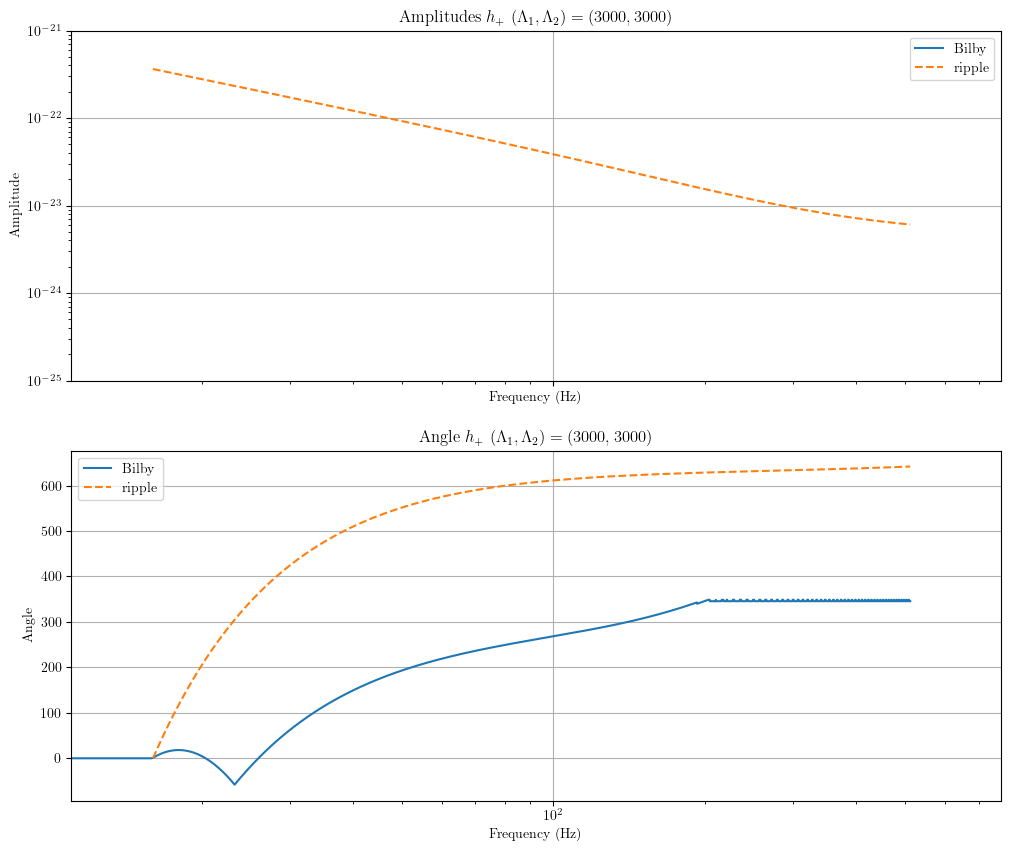

In [ ]:
A_bilby = jnp.abs(hp_bilby)
angle_bilby = np.unwrap(np.angle(hp_bilby)) #% (2 * np.pi)
phase_bilby = hp_bilby / A_bilby

A_ripple = jnp.abs(hp_ripple)
angle_ripple = np.unwrap(np.angle(hp_ripple)) #% (2 * np.pi)
phase_ripple = hp_ripple / A_ripple

# Choose whether we plot the angle or the phase
plot_angle = True

plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplot(2, 1, 1)

# Plot the amplitude
plt.plot(waveform_generator.frequency_array, A_bilby, "-", label = "Bilby")
plt.plot(fs_ripple, A_ripple, "--", label = "ripple")
plt.title(r"Amplitudes $h_+$ ($\Lambda_1, \Lambda_2) = ({}, {}$)".format(lambda1, lambda2))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.ylim(1e-25, 1e-21)
plt.xlim(f_l - 5)
plt.legend()

# Plot the angle or the phase
plt.subplot(2, 1, 2)
if plot_angle:
    plt.plot(waveform_generator.frequency_array, angle_bilby, "-", label = "Bilby")
    plt.plot(fs_ripple, angle_ripple, "--", label = "ripple")
    name = "Angle"
else:
    plt.plot(waveform_generator.frequency_array, phase_bilby, "-", label = "Bilby")
    plt.plot(fs_ripple, phase_ripple, "--", label = "ripple")
    name = "Phase"
plt.legend()
plt.title(r"{} $h_+$ ($\Lambda_1, \Lambda_2) = ({}, {}$)".format(name, lambda1, lambda2))
plt.xlabel("Frequency (Hz)")
plt.ylabel(f"{name}")
plt.xscale('log')
plt.xlim(f_l - 5)
plt.show()